# Imports

In [1]:
import numpy as np

In [2]:
# spectrum dataclass
from src.spectrum import SpectrumData, from_str, SpectrumValueType, LinealEnergySpectrum
from src.paths import project_dir

In [3]:
# plotting
import matplotlib

%matplotlib inline
import matplotlib.pylab as plt

In [4]:
!python -V

Python 3.11.4


# Small data

In [5]:
yfy_str = """
1 2
2 2
3 2
"""
s = from_str(yfy_str)
print(s)

bin_centers:
[1. 2. 3.]

bin_values_freq:
[2.         1.         0.66666667]

bin_values_freq_times_x:
[2. 2. 2.]

bin_values_dose_times_x:
[1.22222222 2.44444444 3.66666667]

bin_values_dose:
[1.22222222 1.22222222 1.22222222]

bin_values_freq_normalized:
[0.54545455 0.27272727 0.18181818]

bin_values_freq_times_x_normalized:
[0.54545455 0.54545455 0.54545455]

bin_values_dose_normalized:
[0.33333333 0.33333333 0.33333333]

bin_values_dose_times_x_normalized:
[0.33333333 0.66666667 1.        ]

bin_edges:
[0.5 1.5 2.5 3.5]

bin_widths:
[1. 1. 1.]




In [6]:
s.freq_mean

1.6363636363636365

Text(0, 0.5, 'ydy')

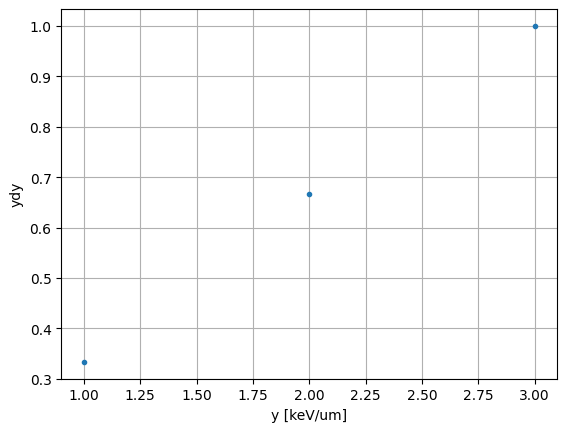

In [7]:
plt.plot(s.bin_centers, s.bin_values_dose_times_x_normalized, ".")
# plt.xscale('log')
plt.grid()
plt.xlabel("y [keV/um]")
plt.ylabel("ydy")

# Digitised spectrum

In [8]:
data_file = project_dir / "data" / "interim" / "Xrays_25keV_1um_yfy.csv"
data_file

PosixPath('/home/grzanka/workspace/widma/data/interim/Xrays_25keV_1um_yfy.csv')

In [9]:
spectrum = LinealEnergySpectrum.from_csv(
    data_file, value_type=SpectrumValueType.yfy, delimiter=","
)
print(spectrum)

LinealEnergySpectrum(data=SpectrumData(bin_centers=array([ 0.14723549,  0.16909782,  0.18889329,  0.22611843,  0.25966758,
        0.28213002,  0.31512591,  0.36175358,  0.39840591,  0.4573331 ,
        0.51056237,  0.56995833,  0.63623206,  0.69981281,  0.8141092 ,
        0.90799492,  1.01219814,  1.14362935,  1.25740947,  1.40065407,
        1.5629687 ,  1.84488669,  2.00296477,  2.29956538,  2.56656704,
        2.8268924 ,  3.15782321,  3.62616632,  4.04577311,  4.52007509,
        4.92222081,  5.81298424,  6.3234698 ,  7.19545075,  8.0812021 ,
        8.94264455,  9.87899124, 11.36073835, 12.52313449, 14.19131917,
       15.63624549, 17.22829076, 20.3409357 , 25.38340391, 27.96788164]), bin_values_freq=array([ 2.55758865e-02,  2.07176675e-02,  2.32111163e-02,  2.75314033e-02,
        3.13670303e-02,  3.60457576e-02,  4.19918226e-02,  6.29969885e-02,
        7.86478440e-02,  9.17962100e-02,  1.09594076e-01,  1.24603462e-01,
        1.37015976e-01,  1.75751924e-01,  1.77525246e-01, 

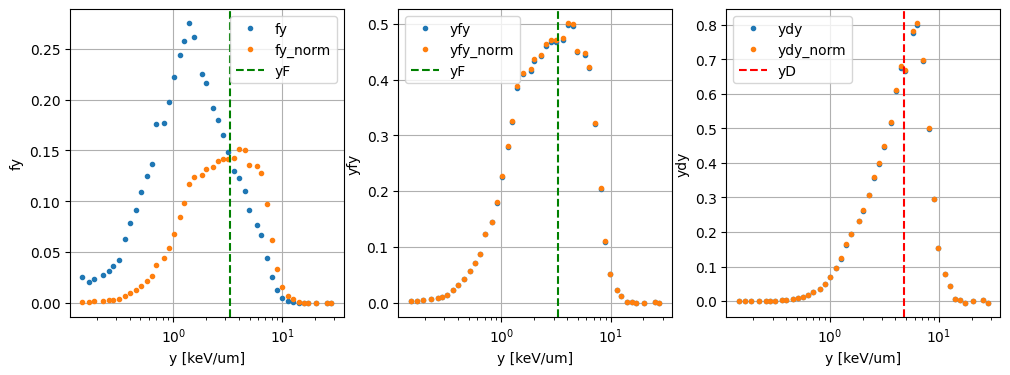

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
ax[0].plot(spectrum.y, spectrum.fy, ".", label="fy")
ax[0].plot(spectrum.y, spectrum.data.bin_values_dose_normalized, ".", label="fy_norm")
ax[0].axvline(spectrum.yF, color="g", linestyle="--", label="yF")
ax[0].set_ylabel("fy")
ax[1].plot(spectrum.y, spectrum.yfy, ".", label="yfy")
ax[1].plot(
    spectrum.y, spectrum.data.bin_values_freq_times_x_normalized, ".", label="yfy_norm"
)
ax[1].axvline(spectrum.yF, color="g", linestyle="--", label="yF")
ax[1].set_ylabel("yfy")
ax[2].plot(spectrum.y, spectrum.ydy, ".", label="ydy")
ax[2].plot(
    spectrum.y, spectrum.data.bin_values_dose_times_x_normalized, ".", label="ydy_norm"
)
ax[2].axvline(spectrum.yD, color="r", linestyle="--", label="yD")
ax[2].set_ylabel("ydy")
for a in ax:
    a.set_xscale("log")
    # a.set_yscale('log')
    a.grid()
    a.set_xlabel("y [keV/um]")
    a.legend()

In [11]:
spectrum.norm

0.9938634018608192

# Rebinning

In [12]:
spectrum.data.binning_type

<SpectrumBinningType.unknown: 3>

In [13]:
xvalues = np.geomspace(
    start=spectrum.data.bin_edges[0] / 2, stop=spectrum.data.bin_edges[-1] * 2, num=1000
)
values_fy = spectrum.data.bin_values(xvalues, spectrum_value_type=SpectrumValueType.fy)
values_yfy = spectrum.data.bin_values(
    xvalues, spectrum_value_type=SpectrumValueType.yfy
)
values_ydy = spectrum.data.bin_values(
    xvalues, spectrum_value_type=SpectrumValueType.ydy
)

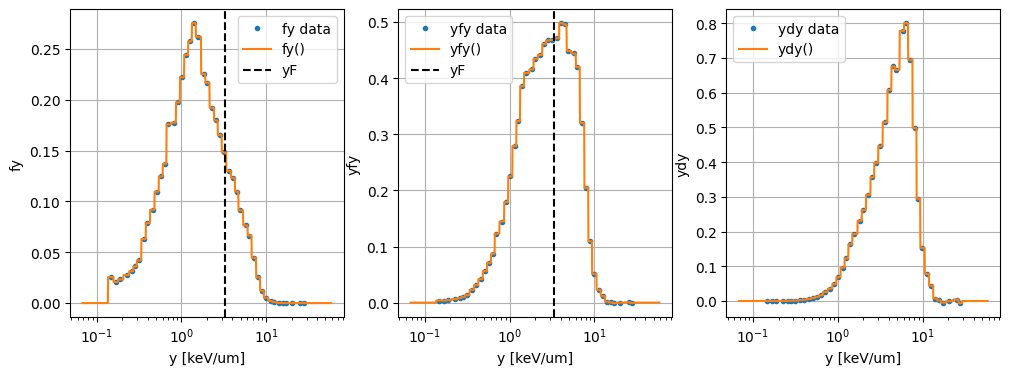

In [14]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
ax[0].plot(spectrum.y, spectrum.fy, ".", label="fy data")
ax[0].plot(xvalues, values_fy, label="fy()")
ax[0].axvline(spectrum.yF, color="k", linestyle="--", label="yF")
ax[0].set_ylabel("fy")
ax[1].plot(spectrum.y, spectrum.yfy, ".", label="yfy data")
ax[1].plot(xvalues, values_yfy, label="yfy()")
ax[1].axvline(spectrum.yF, color="k", linestyle="--", label="yF")
ax[1].set_ylabel("yfy")
ax[2].plot(spectrum.y, spectrum.ydy, ".", label="ydy data")
ax[2].plot(xvalues, values_ydy, label="ydy()")
ax[2].set_ylabel("ydy")
for a in ax:
    a.set_xscale("log")
    # a.set_yscale('log')
    a.grid()
    a.set_xlabel("y [keV/um]")
    a.legend()

# Norm check

In [15]:
def f_norm(spectrum_data: SpectrumData) -> float:
    from scipy.integrate import quad

    def integrand_for_norm(t: float, data_for_integrand: SpectrumData) -> float:
        return data_for_integrand.data.bin_value(
            t, spectrum_value_type=SpectrumValueType.freq
        )

    I = quad(
        integrand_for_norm,
        spectrum_data.data.bin_edges[0],
        spectrum_data.data.bin_edges[-1],
        args=(spectrum_data,),
        limit=500,
        epsabs=1e-5,
        epsrel=1e-4,
    )
    return I[0]

In [16]:
f_norm(spectrum), spectrum.norm

(0.9938776064434781, 0.9938634018608192)